In [2]:
!pip install seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.2 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ----------- -

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    r"C:\Users\Raji_kabilan\OneDrive\Documents\GitHub\Habitability-of-Exoplanets\phl_exoplanet_catalog_2019.csv"
)

In [9]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [10]:
df.shape
df.columns


Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [11]:
import os

os.makedirs("Dataset", exist_ok=True)
df.to_csv("Dataset/step0_raw_original.csv", index=False)


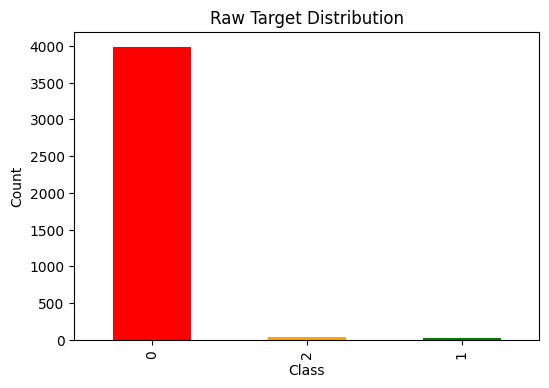

In [12]:
target_col = "P_HABITABLE"
plt.figure(figsize=(6,4))
df[target_col].value_counts().plot(kind="bar", color=["red","orange","green"])
plt.title("Raw Target Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [14]:
df.dtypes

P_NAME                    object
P_STATUS                 float64
P_MASS                   float64
P_MASS_ERROR_MIN         float64
P_MASS_ERROR_MAX         float64
                          ...   
S_CONSTELLATION_ABR       object
S_CONSTELLATION_ENG       object
P_RADIUS_EST             float64
P_MASS_EST               float64
P_SEMI_MAJOR_AXIS_EST    float64
Length: 112, dtype: object

In [15]:
missing_count = df.isnull().sum()
missing_count.sort_values(ascending=False)

P_ATMOSPHERE           4048
P_ALT_NAMES            4048
P_DETECTION_RADIUS     4048
P_GEO_ALBEDO           4048
P_DETECTION_MASS       4048
                       ... 
P_HABITABLE               0
S_CONSTELLATION_ABR       0
S_CONSTELLATION_ENG       0
P_RADIUS_EST              0
P_MASS_EST                0
Length: 112, dtype: int64

In [20]:
missing_percent = (missing_count / len(df)) * 100
missing_percent.sort_values(ascending=False)

P_ATMOSPHERE           100.0
P_ALT_NAMES            100.0
P_DETECTION_RADIUS     100.0
P_GEO_ALBEDO           100.0
P_DETECTION_MASS       100.0
                       ...  
P_HABITABLE              0.0
S_CONSTELLATION_ABR      0.0
S_CONSTELLATION_ENG      0.0
P_RADIUS_EST             0.0
P_MASS_EST               0.0
Length: 112, dtype: float64

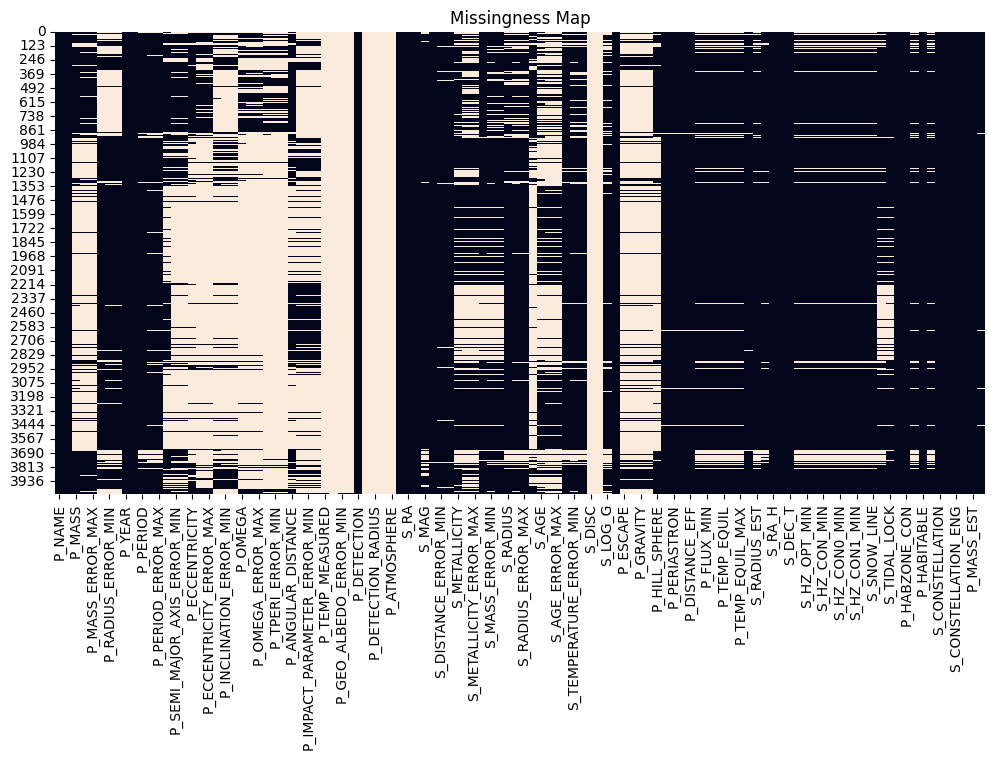

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missingness Map")
plt.show()

In [22]:
cols_to_drop = missing_percent[missing_percent > 75].index
cols_to_drop

Index(['P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION',
       'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA',
       'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI',
       'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_TEMP_MEASURED',
       'P_GEO_ALBEDO', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX',
       'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE',
       'S_DISC', 'S_MAGNETIC_FIELD', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY',
       'P_DENSITY'],
      dtype='object')

In [23]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape

(4048, 87)

In [24]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

len(num_cols), len(cat_cols)

(73, 14)

In [25]:
df_clean[num_cols].describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


In [26]:
df_clean[cat_cols].nunique().sort_values(ascending=False)

P_NAME                 4048
S_NAME                 3010
S_RA_T                 3010
S_DEC_T                3010
S_ALT_NAMES             584
S_TYPE                  210
P_UPDATED               184
S_CONSTELLATION_ENG      88
S_CONSTELLATION_ABR      88
S_CONSTELLATION          88
P_DETECTION              10
S_TYPE_TEMP               7
P_TYPE                    6
P_TYPE_TEMP               3
dtype: int64

In [27]:
df_clean.to_csv(
    './Dataset/phl_exoplanet_after_basic_eda.csv',
    index=False
)

In [28]:
num_cols = num_cols.drop('P_HABITABLE', errors='ignore')

num_cols

Index(['P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX',
       'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
       'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ANGULAR_DISTANCE',
       'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX', 'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE',
       'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY',
       'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_MASS',
       'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS',
       'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_AGE', 'S_AGE_ERROR_MIN',
       'S_AGE_ERROR_MAX', 'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN',
       'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_HILL_SPHERE', 'P_DISTANCE',
       'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_FLUX_MIN',
       'P_FL